In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from yahoo_fin import stock_info as si

df = si.get_data('AAPL', start_date='2010-01-01', end_date='2023-12-31')
print(df.head())

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.
                open      high       low     close  adjclose     volume ticker
2010-01-04  7.622500  7.660714  7.585000  7.643214  6.447411  493729600   AAPL
2010-01-05  7.664286  7.699643  7.616071  7.656429  6.458560  601904800   AAPL
2010-01-06  7.656429  7.686786  7.526786  7.534643  6.355828  552160000   AAPL
2010-01-07  7.562500  7.571429  7.466071  7.520714  6.344077  477131200   AAPL
2010-01-08  7.510714  7.571429  7.466429  7.570714  6.386255  447610800   AAPL


In [3]:
print(df.tail())

                  open        high         low       close    adjclose  \
2023-12-22  195.179993  195.410004  192.970001  193.600006  192.656189   
2023-12-26  193.610001  193.889999  192.830002  193.050003  192.108841   
2023-12-27  192.490005  193.500000  191.089996  193.149994  192.208359   
2023-12-28  194.139999  194.660004  193.169998  193.580002  192.636261   
2023-12-29  193.899994  194.399994  191.729996  192.529999  191.591385   

              volume ticker  
2023-12-22  37122800   AAPL  
2023-12-26  28919300   AAPL  
2023-12-27  48087700   AAPL  
2023-12-28  34049900   AAPL  
2023-12-29  42628800   AAPL  


In [4]:
df=df.reset_index()
print(df.head())


       index      open      high       low     close  adjclose     volume  \
0 2010-01-04  7.622500  7.660714  7.585000  7.643214  6.447411  493729600   
1 2010-01-05  7.664286  7.699643  7.616071  7.656429  6.458560  601904800   
2 2010-01-06  7.656429  7.686786  7.526786  7.534643  6.355828  552160000   
3 2010-01-07  7.562500  7.571429  7.466071  7.520714  6.344077  477131200   
4 2010-01-08  7.510714  7.571429  7.466429  7.570714  6.386255  447610800   

  ticker  
0   AAPL  
1   AAPL  
2   AAPL  
3   AAPL  
4   AAPL  


In [5]:
df=df.rename(columns={'index':'date'})

In [6]:
print(df)

           date        open        high         low       close    adjclose  \
0    2010-01-04    7.622500    7.660714    7.585000    7.643214    6.447411   
1    2010-01-05    7.664286    7.699643    7.616071    7.656429    6.458560   
2    2010-01-06    7.656429    7.686786    7.526786    7.534643    6.355828   
3    2010-01-07    7.562500    7.571429    7.466071    7.520714    6.344077   
4    2010-01-08    7.510714    7.571429    7.466429    7.570714    6.386255   
...         ...         ...         ...         ...         ...         ...   
3517 2023-12-22  195.179993  195.410004  192.970001  193.600006  192.656189   
3518 2023-12-26  193.610001  193.889999  192.830002  193.050003  192.108841   
3519 2023-12-27  192.490005  193.500000  191.089996  193.149994  192.208359   
3520 2023-12-28  194.139999  194.660004  193.169998  193.580002  192.636261   
3521 2023-12-29  193.899994  194.399994  191.729996  192.529999  191.591385   

         volume ticker  
0     493729600   AAPL  
1

In [7]:
df=df.drop(columns=['date','adjclose'])

In [8]:
print(df.head())

       open      high       low     close     volume ticker
0  7.622500  7.660714  7.585000  7.643214  493729600   AAPL
1  7.664286  7.699643  7.616071  7.656429  601904800   AAPL
2  7.656429  7.686786  7.526786  7.534643  552160000   AAPL
3  7.562500  7.571429  7.466071  7.520714  477131200   AAPL
4  7.510714  7.571429  7.466429  7.570714  447610800   AAPL


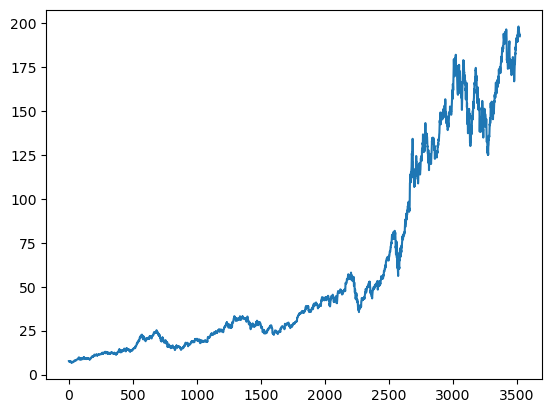

In [9]:
plt.plot(df.close)
plt.show()

In [10]:
ma100=df.close.rolling(100).mean()

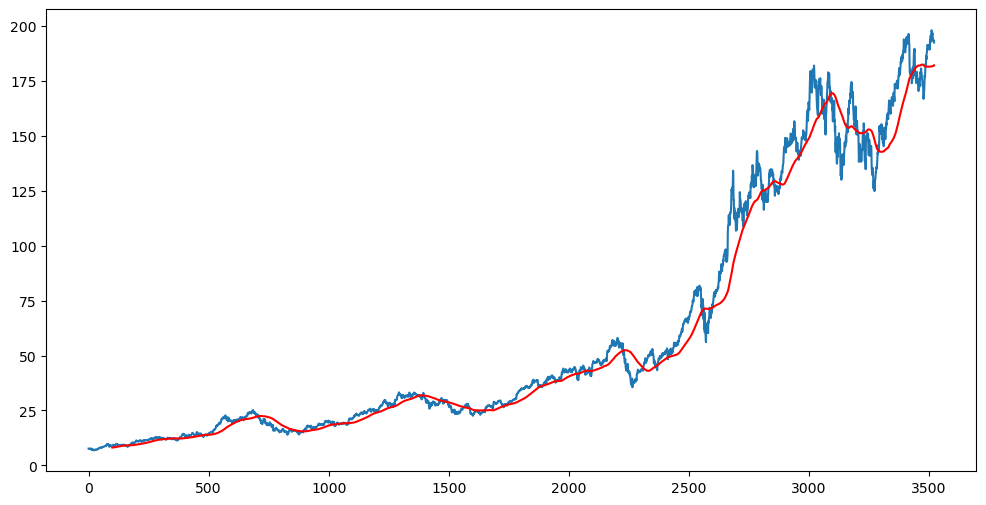

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.close)
plt.plot(ma100,'r')


In [12]:
ma200=df.close.rolling(200).mean()


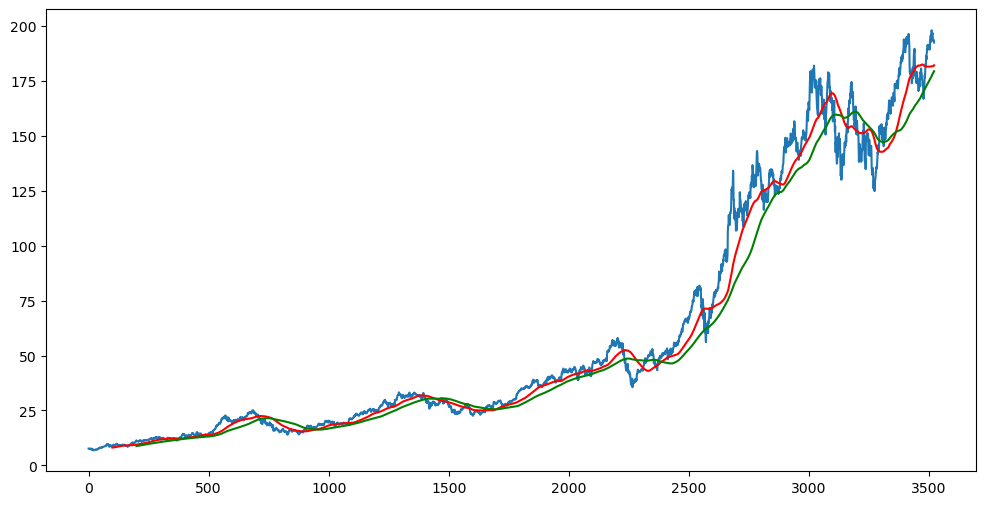

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df.close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [14]:
#splitting  data into testing and training

data_training = pd.DataFrame(df['close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2465, 1)
(1057, 1)


In [15]:
data_training.head()

,close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [16]:
data_testing.tail()

,close
3517,193.600006
3518,193.050003
3519,193.149994
3520,193.580002
3521,192.529999


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_array = scaler.fit_transform(data_training)
data_training_array


array([[0.01502647],
       [0.01527965],
       [0.01294631],
       ...,
       [0.99573703],
       [0.9911866 ],
       [0.99554539]])

In [19]:
data_training_array.shape

(2465, 1)

In [20]:
x_train =[]
y_train =[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train ,y_train = np.array(x_train),np.array(y_train)

In [21]:
x_train.shape

(2365, 100, 1)

In [23]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [24]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))



model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))



model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\HARSHVARDHAN\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 103ms/step - loss: 0.0692
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 0.0069
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - loss: 0.0073
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - loss: 0.0067
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - loss: 0.0052
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 0.0053
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - loss: 0.0050
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0054
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 0.0046
Epoch 10/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - loss: 0.0047
Epoch 11/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 0.0041
Epoch 12/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/step - loss: 0.0050
Epoch 13/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - loss: 0.0044
Epoch 14/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 0.0035
Epoch 15/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 136ms/st

In [41]:
model.save('my_model.keras')

In [42]:
past_100_days = data_training.tail(100)

In [43]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [44]:
final_df.head()

,close
0,44.345001
1,44.575001
2,43.767502
3,43.325001
4,44.910000


In [45]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00658979],
       [0.00807572],
       [0.00285881],
       ...,
       [0.96795551],
       [0.97073361],
       [0.96394998]])

In [46]:
input_data.shape

(1157, 1)

In [47]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [48]:
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1057, 100, 1)
(1057,)


In [49]:
#making predictions

y_predicted = model.predict(x_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [50]:
y_predicted.shape

(1057, 1)

In [51]:
scaler.scale_

array([0.00646057])

In [52]:
scale_factor = 1/0.00646057
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

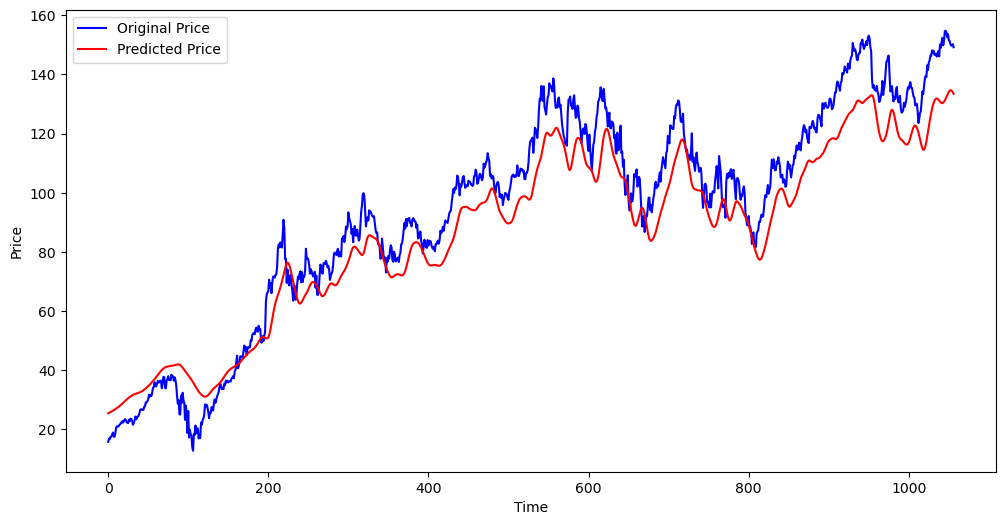

In [53]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()